<a href="https://colab.research.google.com/github/ddiriba/Inboxicated/blob/main/MLTraining/drunk_detection_final_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# define test path
test_path = '/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/test'

In [ ]:
# get image size
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from PIL import Image
import numpy as np
img = Image.open('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/test/Drunk/05_artemis_4_f_F_25_59_frame_01.jpg')
numpy_data = np.asarray(img)
input_shape = numpy_data.shape
print(input_shape)

(128, 96, 3)


In [ ]:
import os
test_datagen = ImageDataGenerator(rescale=1. / 255) 
epochs = 10
batch_size = 16
img_height, img_width, channels = input_shape
testing_samples = len(os.listdir('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/test/Drunk')) + len(os.listdir('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/test/Sober'))
test_generator = test_datagen.flow_from_directory( 
    test_path, 
    target_size=(img_width, img_height), 
    batch_size=batch_size, 
    class_mode='binary')
label_map = (test_generator.class_indices)
print(label_map)

Found 600 images belonging to 2 classes.
{'Drunk': 0, 'Sober': 1}


{'Drunk': 0, 'Sober': 1}
37/37 [==============================] - 3s 70ms/step - loss: 0.6904 - accuracy: 0.7855
loss: 0.690 - acc: 0.785
False Positives:  249
True Positives:  249


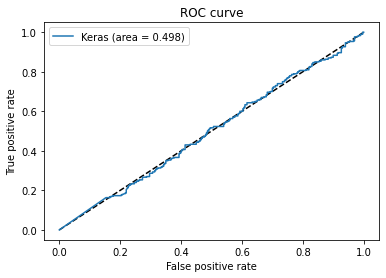

In [ ]:
from keras.models import load_model
from sklearn.metrics import roc_curve

trained_model = load_model('/content/drive/MyDrive/CS_426_Team_17/current_drunk_model.h5')
label_map = (test_generator.class_indices)
print(label_map)
score = trained_model.evaluate(test_generator, steps= testing_samples//batch_size, batch_size=batch_size)
print("loss: %.3f - acc: %.3f" % (score[0], score[1]))
predicted_labels = trained_model.predict(test_generator)
true_labels = test_generator.labels
#print(predicted_labels)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(true_labels, predicted_labels)
print("False Positives: ", len(fpr_keras))
print("True Positives: ", len(tpr_keras))
#print(thresholds_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

Below testing images taken within Inboxiacted application

In [ ]:
# testing inboxicated images
import os
from keras.models import load_model
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

trained_model = load_model('/content/drive/MyDrive/CS_426_Team_17/current_drunk_model.h5')
# drunk = 0, sober = 1

john.jpg


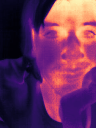

john7.jpg


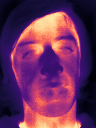

john4.jpg


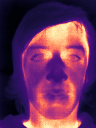

john6.jpg


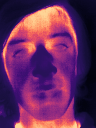

john3.jpg


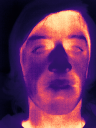

john1.jpg


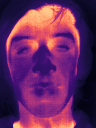

john2.jpg


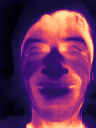

john10.jpg


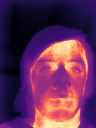

john5.jpg


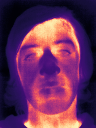

john8.jpg


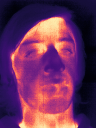

john9.jpg


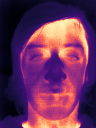

dawit7.jpg


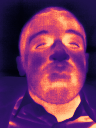

dawit9.jpg


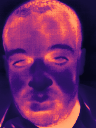

dawit4.jpg


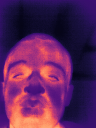

dawit6.jpg


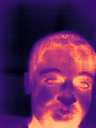

dawit1.jpg


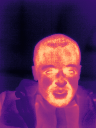

dawit10.jpg


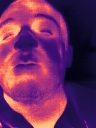

dawit8.jpg


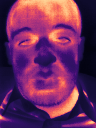

dawit2.jpg


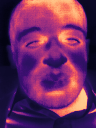

dawit5.jpg


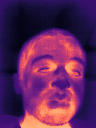

dawit3.jpg


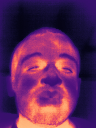

megan5.jpg


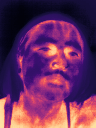

megan6.jpg


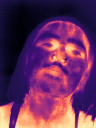

megan3.jpg


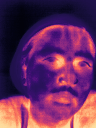

megan4.jpg


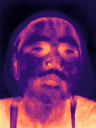

megan8.jpg


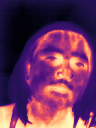

megan9.jpg


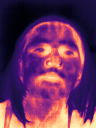

megan7.jpg


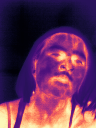

megan1.jpg


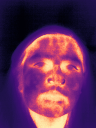

megan2.jpg


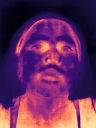

megan10.jpg


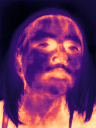

john11.jpg


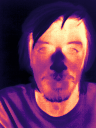

john12.png


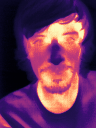

john13.jpg


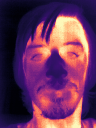

In [ ]:
base_path = '/content/drive/MyDrive/CS_426_Team_17/DrunkDetectionTraining/sober/'
numpy_data_array = []
for image in os.listdir(base_path):
  print(image)
  img = cv2.imread(base_path+image)
  img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
  img = cv2.applyColorMap(img, cv2.COLORMAP_MAGMA)
  height, width, channels = img.shape
  if width > height:
    img = cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE)
  img = cv2.resize(img, (96,128))
  cv2_imshow(img)
  numpy_data_array.append(np.asarray(img) * 1./255)

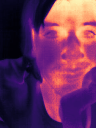

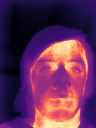

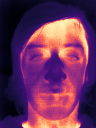

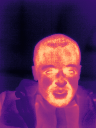

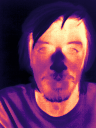

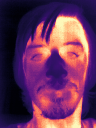

Deemed sober:  6
Deemed intoxicated:  28
Accuracy: 0.17647058823529413


In [ ]:
# here count predictions of the model
count_drunk = 0
count_sober = 0
for i in numpy_data_array:
  img_height, img_width, channels = i.shape
  i = i.reshape(-1, img_height, img_width, channels)
  output = trained_model.predict(i)
  new = np.squeeze(i)
  new = (255 * new).astype('int')
  if float(output) >=0.5:
    count_sober+=1
    cv2_imshow(new)
  else:
    count_drunk+=1

print("Deemed sober: ", count_sober)
print("Deemed intoxicated: ",count_drunk)
print("Accuracy:", float(count_sober)/float(count_sober+count_drunk))

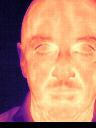

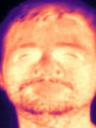

In [ ]:
import cv2
base = '/content/drive/MyDrive/CS_426_Team_17/TrainingImages/unused/'
for image in os.listdir(base):
  if image == 'Sujeto_1_2_32.jpg' or image == '35_thanasis_2_f_M_48_81_frame_49.jpg':
    img = cv2.imread(base+image)
    cv2.imwrite(image, img)
    cv2_imshow(img)

In [ ]:
array = []
array2 = []
for image in os.listdir('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/test/Drunk'):
  img = cv2.imread('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/test/Drunk/' + image)
  numpy = np.asarray(img) * 1./255
  img_height, img_width, channels = numpy.shape
  numpy = numpy.reshape(-1, img_height, img_width, channels)
  array2.append(trained_model.predict(numpy))

img = cv2.imread('/content/drive/MyDrive/CS_426_Team_17/TrainingImagesSplit/test/Sober/Sujeto_46_1_48.jpg')
numpy = np.asarray(img) * 1./255
img_height, img_width, channels = numpy.shape
numpy = numpy.reshape(-1, img_height, img_width, channels)
trained_model.predict(numpy)


array([[0.19710082]], dtype=float32)

In [ ]:
print(array)
print(array2)
#print(min(array), max(array))
print(min(array2), max(array2))

[]
[array([[0.19933927]], dtype=float32), array([[0.20868924]], dtype=float32), array([[0.20851964]], dtype=float32), array([[0.20007583]], dtype=float32), array([[0.19997516]], dtype=float32), array([[0.19945318]], dtype=float32), array([[0.19976294]], dtype=float32), array([[0.20010099]], dtype=float32), array([[0.20005953]], dtype=float32), array([[0.20815429]], dtype=float32), array([[0.20791948]], dtype=float32), array([[0.2082229]], dtype=float32), array([[0.20046234]], dtype=float32), array([[0.19995254]], dtype=float32), array([[0.19921842]], dtype=float32), array([[0.20785683]], dtype=float32), array([[0.19993371]], dtype=float32), array([[0.20810536]], dtype=float32), array([[0.20842597]], dtype=float32), array([[0.20787328]], dtype=float32), array([[0.20809492]], dtype=float32), array([[0.20004004]], dtype=float32), array([[0.20026484]], dtype=float32), array([[0.19975412]], dtype=float32), array([[0.19980654]], dtype=float32), array([[0.19989607]], dtype=float32), array([[0

In [ ]:
copy = numpy_data2
img_height, img_width, channels = copy.shape
copy = copy.reshape(-1, img_height, img_width, channels)
print(copy.shape)

(1, 128, 96, 3)


In [ ]:
output = trained_model.predict(copy)
print(output)

[[0.]]


(128, 96, 3)
(128, 96, 3)


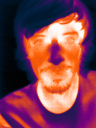

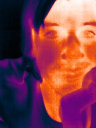

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/CS_426_Team_17/thermal_resize.png')
img2 = cv2.imread('/content/drive/MyDrive/CS_426_Team_17/john.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGRA2BGR)
img2 = cv2.resize(img2, (96,128))
numpy_data1 = np.asarray(img)
input_shape1 = numpy_data1.shape
print(input_shape1)
numpy_data2 = np.asarray(img2)
input_shape2 = numpy_data2.shape
print(input_shape2)
cv2_imshow(img)
cv2_imshow(img2)